Saving 7. Predict Credit Card Fraud.csv to 7. Predict Credit Card Fraud.csv
Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[146   0]
 [ 16 134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       146
           1       1.00      0.89      0.94       150

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



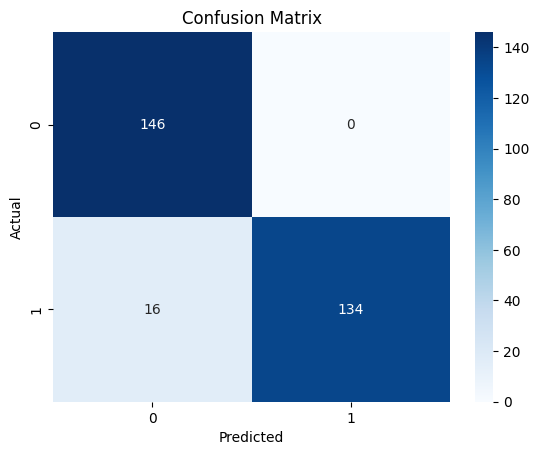

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the file is named like '7. Predict Credit Card Fraud.csv'
df = pd.read_csv(next(iter(uploaded)))

# Step 3: Basic info
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())

# Step 4: Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Step 5: Under-sample the majority class (to balance the data)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=1)

df_balanced = pd.concat([fraud, non_fraud])

# Step 6: Split features and labels
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
